In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import torch
import torchvision.transforms as T
from src.neil.dataset import prepare_dataset_for_training

/home/nsambhu/.conda/envs/dualattentionattack/lib/python3.7/site-packages/chainer/_environment_check.py:75: UserWarning: 
--------------------------------------------------------------------------------
CuPy (cupy) version 8.3.0 may not be compatible with this version of Chainer.
Please consider installing the supported version by running:
  $ pip install 'cupy>=7.7.0,<8.0.0'

See the following page for more details:
  https://docs.cupy.dev/en/latest/install.html
--------------------------------------------------------------------------------

  requirement=requirement, help=help))


In [7]:
sPathNumpy = '/home/nsambhu/github/DualAttentionAttack/src/data/phy_attack/train/data0.npz'
sPathMask = '/home/nsambhu/github/DualAttentionAttack/src/data/masks/data0.png'
sPathRendering = '/home/nsambhu/data1/DAS_output/rendering/data0.png'

In [8]:
result = np.load(sPathNumpy)['img']
mask = cv2.imread(sPathMask)
rendered = cv2.imread(sPathRendering)

In [9]:
def resize_numpy_to_tensor(image: np.ndarray, image_size: int):
    image = torch.from_numpy(image)
    image = T.functional.to_pil_image(image.permute((2,0,1)))
    image = T.functional.resize(image, (image_size, image_size))
    image = T.functional.to_tensor(image)
    return image.permute((1,2,0))

In [10]:
mask = resize_numpy_to_tensor(mask, result.shape[0])

In [11]:
result.shape, mask.shape, rendered.shape

((800, 800, 3), torch.Size([800, 800, 3]), (800, 800, 3))

In [12]:
type(result), type(mask), type(rendered)

(numpy.ndarray, torch.Tensor, numpy.ndarray)

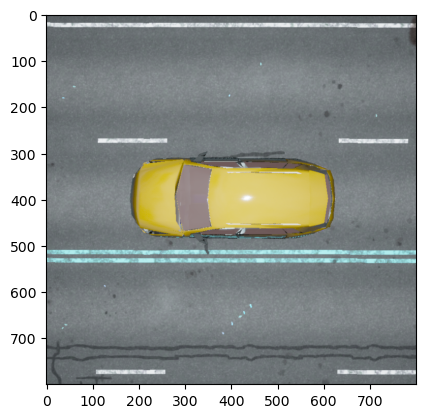

In [129]:
plt.imshow(result)

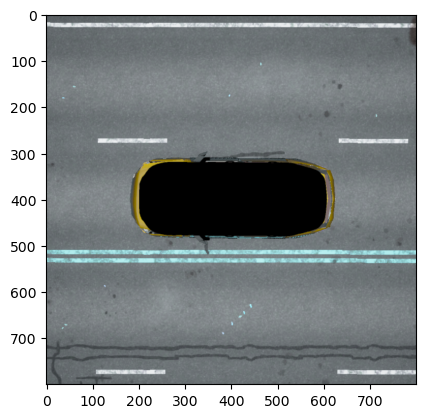

In [130]:
plt.imshow((torch.from_numpy(result)*(1-mask)).int())

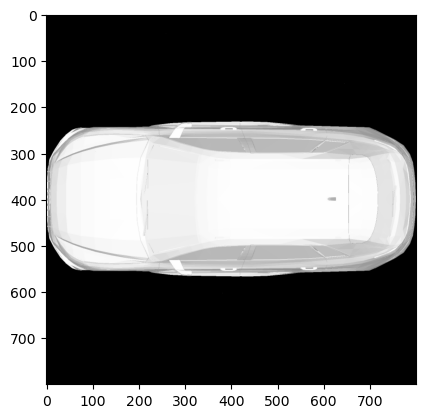

In [134]:
# plt.imshow((255*torch.from_numpy(rendered)*(mask)).int())
# plt.imshow(torch.from_numpy(rendered))
plt.imshow((torch.from_numpy(rendered)).int())



In [ ]:
dataset = '/home/nsambhu/github/DualAttentionAttack/dataset/'
output = '/home/nsambhu/github/DualAttentionAttack/dataset/'
